Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



Define Dataset Paths and Names

In [3]:
# Define a list of dataset paths
dataset_paths = [
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\questionanswer.xlsx",
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\question_answer.xlsx",
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\answer.xlsx",
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\answer_answerkey.xlsx"
]

# Define a list of dataset names corresponding to the paths
dataset_names = ['questionanswer', 'question_answer', 'answer', 'answer_answerkey']


Define Classifiers and Hyperparameter Grids

In [6]:
# Define classifiers with default hyperparameters for multi-class classification
classifiers = {
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameter grids for Perceptron, MLP, and KNN
perceptron_param_grid = {
    'alpha': np.linspace(0.0001, 0.01, 100),
    'max_iter': np.arange(100, 1000, 100),
    'penalty': [None, 'l1', 'l2', 'elasticnet']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': np.linspace(0.001, 0.01, 10)
}

knn_param_grid = {
    'n_neighbors': range(1, 20),  # Adjust range as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) or Euclidean (p=2) distance
}


Define Evaluation Metrics

In [7]:
# Define evaluation metrics for multi-class classification
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro')
}


Define Functions

In [8]:
# Function to perform hyperparameter tuning and evaluate classifiers
def tune_and_evaluate(classifier_name, classifier, param_grid, X_train, y_train):
    print(f"Tuning hyperparameters for {classifier_name}...")
    random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    
    best_params = random_search.best_params_
    classifier.set_params(**best_params)
    
    print(f"Evaluating {classifier_name}...")
    scores = {}
    for metric_name, metric_func in metrics.items():
        score = cross_val_score(classifier, X_train, y_train, cv=5, scoring=make_scorer(metric_func))
        scores[metric_name] = np.mean(score)
    return scores


Main Loop: Load Data, Preprocess, Train Models, and Evaluate

In [14]:
all_results = {}



# Loop over each dataset and evaluate classifiers
for dataset_name, dataset_path in zip(dataset_names, dataset_paths):
    # Load data from Excel file
    data = pd.read_excel(dataset_path)

    # Convert column names to string
    data.columns = data.columns.astype(str)

    # Assuming 'Label' is the column you want to encode (target variable)
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])

    # Separate features (X) and target (y)
    X = data.iloc[:, :-1]
    y = data['Label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Dictionary to store results for current dataset
    dataset_results = {}

    # Tune and evaluate each classifier
    for classifier_name, classifier in classifiers.items():
        if classifier_name == 'Perceptron':
            scores = tune_and_evaluate(classifier_name, classifier, perceptron_param_grid, X_train, y_train)
        elif classifier_name == 'MLP':
            scores = tune_and_evaluate(classifier_name, classifier, mlp_param_grid, X_train, y_train)
        elif classifier_name == 'KNN':
            scores = tune_and_evaluate(classifier_name, classifier, knn_param_grid, X_train, y_train)
        else:
            scores = tune_and_evaluate(classifier_name, classifier, {}, X_train, y_train)  # Use empty param_grid for classifiers with default parameters

        # Store scores for current classifier in the dataset_results dictionary
        dataset_results[classifier_name] = scores

    # Store dataset_results in all_results dictionary under the current dataset_name
    all_results[dataset_name] = dataset_results

# Create a DataFrame from all_results for saving to Excel
final_results = pd.DataFrame.from_dict({(dataset_name, clf_name): all_results[dataset_name][clf_name]
                                        for dataset_name in all_results.keys()
                                        for clf_name in all_results[dataset_name].keys()},
                                       orient='index')

# Save final_results to Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx"
final_results.to_excel(output_file_path, index=True)  # Save DataFrame to Excel  
print(f"Final results saved to {output_file_path}")

Tuning hyperparameters for Perceptron...
Evaluating Perceptron...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Tuning hyperparameters for MLP...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Evaluating MLP...
Tuning hyperparameters for SVM...
Evaluating SVM...
Tuning hyperparameters for Decision Tree...
Evaluating Decision Tree...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning hyperparameters for Random Forest...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating Random Forest...
Tuning hyperparameters for AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

Evaluating AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Tuning hyperparameters for Naive Bayes...
Evaluating Naive Bayes...
Tuning hyperparameters for KNN...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating KNN...
Tuning hyperparameters for Perceptron...
Evaluating Perceptron...
Tuning hyperparameters for MLP...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Evaluating MLP...
Tuning hyperparameters for SVM...
Evaluating SVM...
Tuning hyperparameters for Decision Tree...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating Decision Tree...
Tuning hyperparameters for Random Forest...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating Random Forest...
Tuning hyperparameters for AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

Evaluating AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Tuning hyperparameters for Naive Bayes...
Evaluating Naive Bayes...
Tuning hyperparameters for KNN...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating KNN...
Tuning hyperparameters for Perceptron...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Evaluating Perceptron...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

Tuning hyperparameters for MLP...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warni

Evaluating MLP...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Tuning hyperparameters for SVM...
Evaluating SVM...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Tuning hyperparameters for Decision Tree...
Evaluating Decision Tree...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

Tuning hyperparameters for Random Forest...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Evaluating Random Forest...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

Tuning hyperparameters for AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm 

Evaluating AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME 

Tuning hyperparameters for Naive Bayes...
Evaluating Naive Bayes...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

Tuning hyperparameters for KNN...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Evaluating KNN...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

Tuning hyperparameters for Perceptron...
Evaluating Perceptron...
Tuning hyperparameters for MLP...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Evaluating MLP...
Tuning hyperparameters for SVM...
Evaluating SVM...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning hyperparameters for Decision Tree...
Evaluating Decision Tree...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning hyperparameters for Random Forest...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluating Random Forest...
Tuning hyperparameters for AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

Evaluating AdaBoost...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

Tuning hyperparameters for Naive Bayes...
Evaluating Naive Bayes...


c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuning hyperparameters for KNN...
Evaluating KNN...
Final results saved to C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx


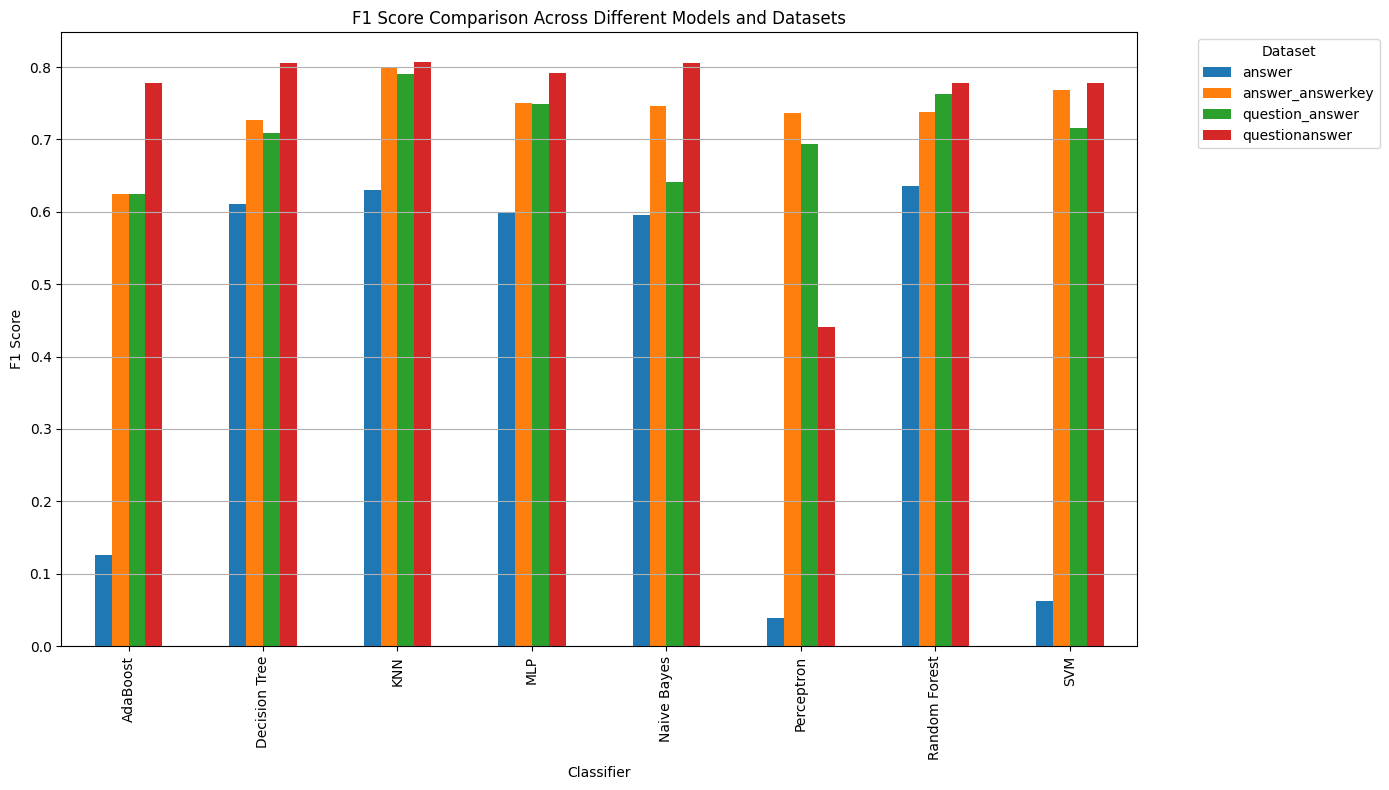

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final results from the Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx"
final_results = pd.read_excel(output_file_path, index_col=[0, 1])

# Reset index to have 'Dataset' and 'Classifier' as columns
final_results = final_results.reset_index().rename(columns={'level_0': 'Dataset', 'level_1': 'Classifier'})

# Filter the results to include only F1 scores
f1_scores = final_results.pivot(index='Classifier', columns='Dataset', values='F1 Score')

# Plotting the F1 scores
f1_scores.plot(kind='bar', figsize=(14, 8))
plt.title('F1 Score Comparison Across Different Models and Datasets')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


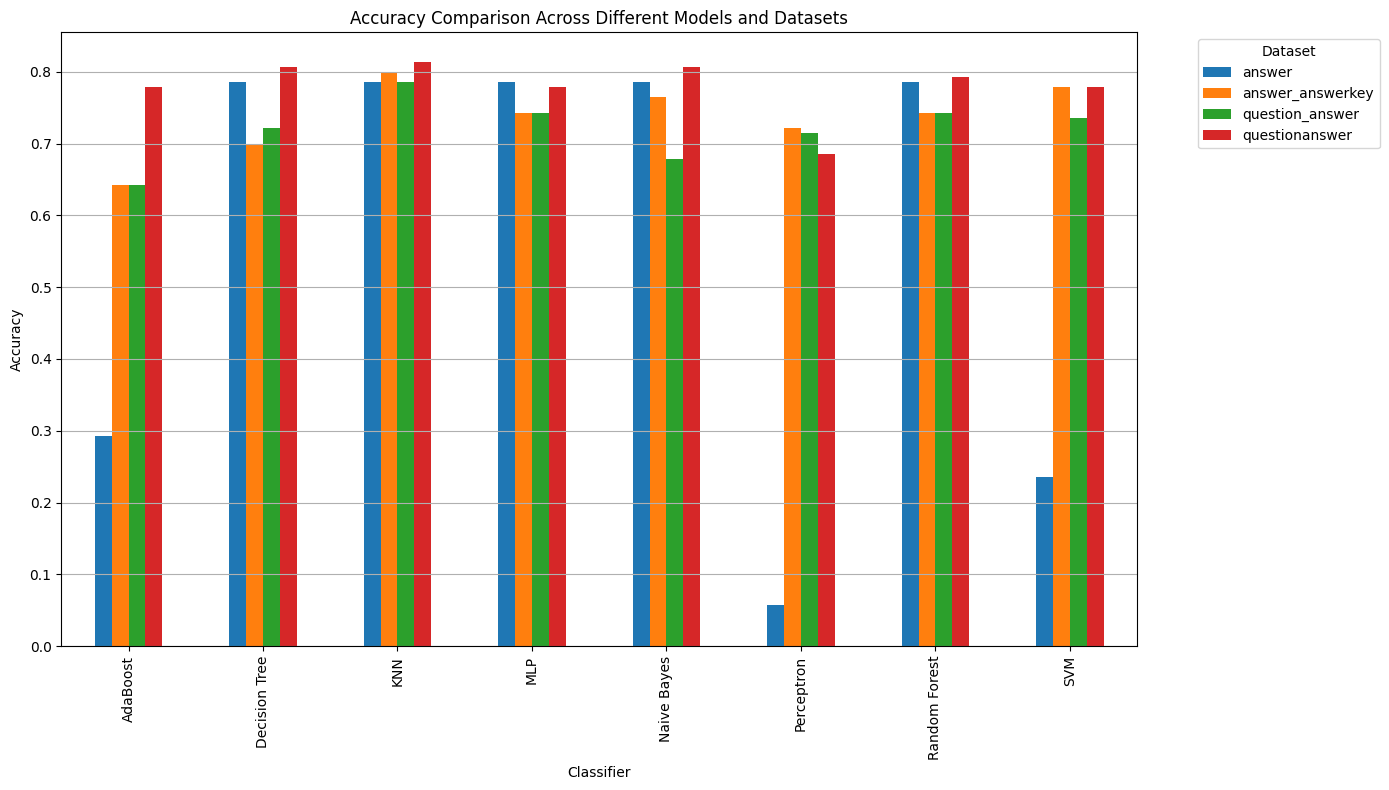

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final results from the Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx"
final_results = pd.read_excel(output_file_path, index_col=[0, 1])

# Reset index to have 'Dataset' and 'Classifier' as columns
final_results = final_results.reset_index().rename(columns={'level_0': 'Dataset', 'level_1': 'Classifier'})

# Filter the results to include only Accuracy scores
accuracy_scores = final_results.pivot(index='Classifier', columns='Dataset', values='Accuracy')

# Plotting the Accuracy scores
accuracy_scores.plot(kind='bar', figsize=(14, 8))
plt.title('Accuracy Comparison Across Different Models and Datasets')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


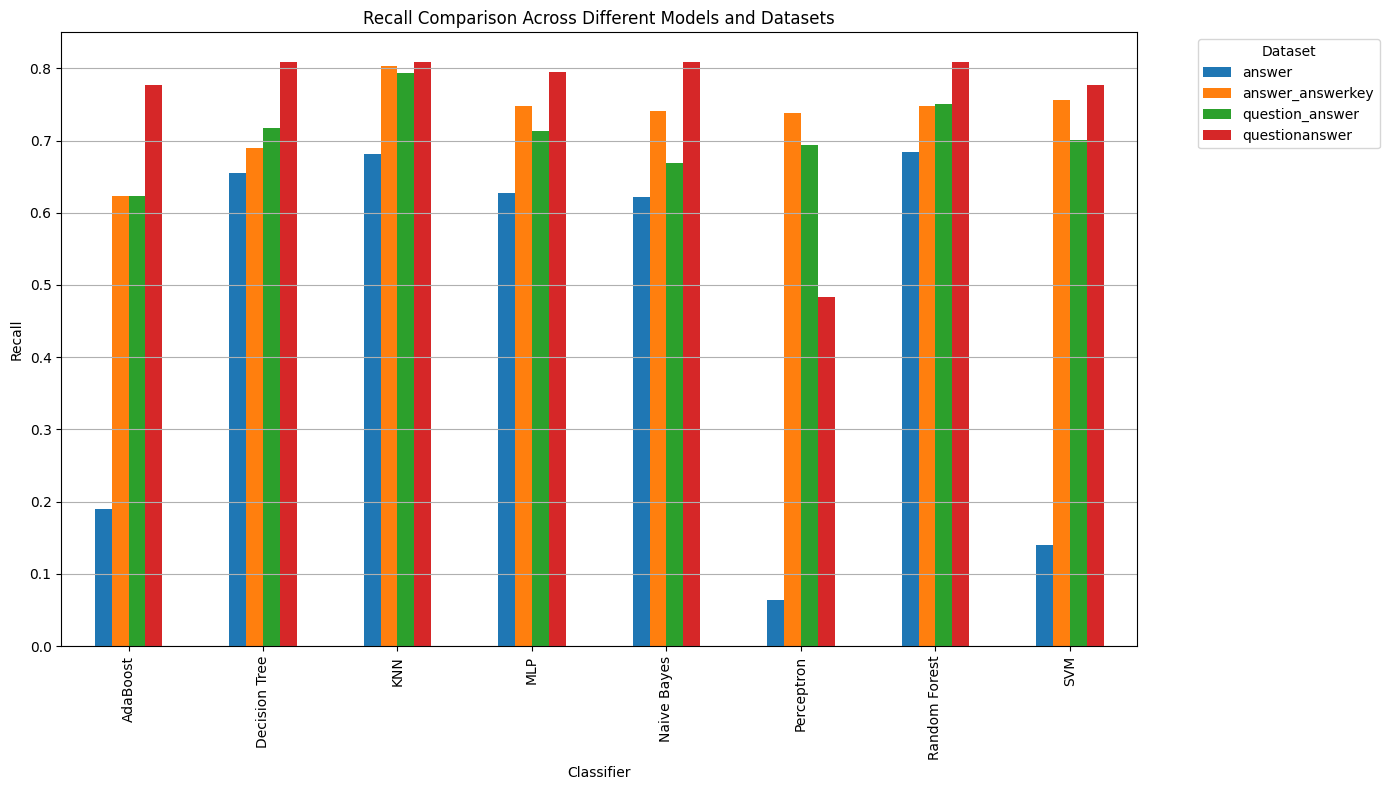

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final results from the Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx"
final_results = pd.read_excel(output_file_path, index_col=[0, 1])

# Reset index to have 'Dataset' and 'Classifier' as columns
final_results = final_results.reset_index().rename(columns={'level_0': 'Dataset', 'level_1': 'Classifier'})

# Filter the results to include only Recall scores
recall_scores = final_results.pivot(index='Classifier', columns='Dataset', values='Recall')

# Plotting the Recall scores
recall_scores.plot(kind='bar', figsize=(14, 8))
plt.title('Recall Comparison Across Different Models and Datasets')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


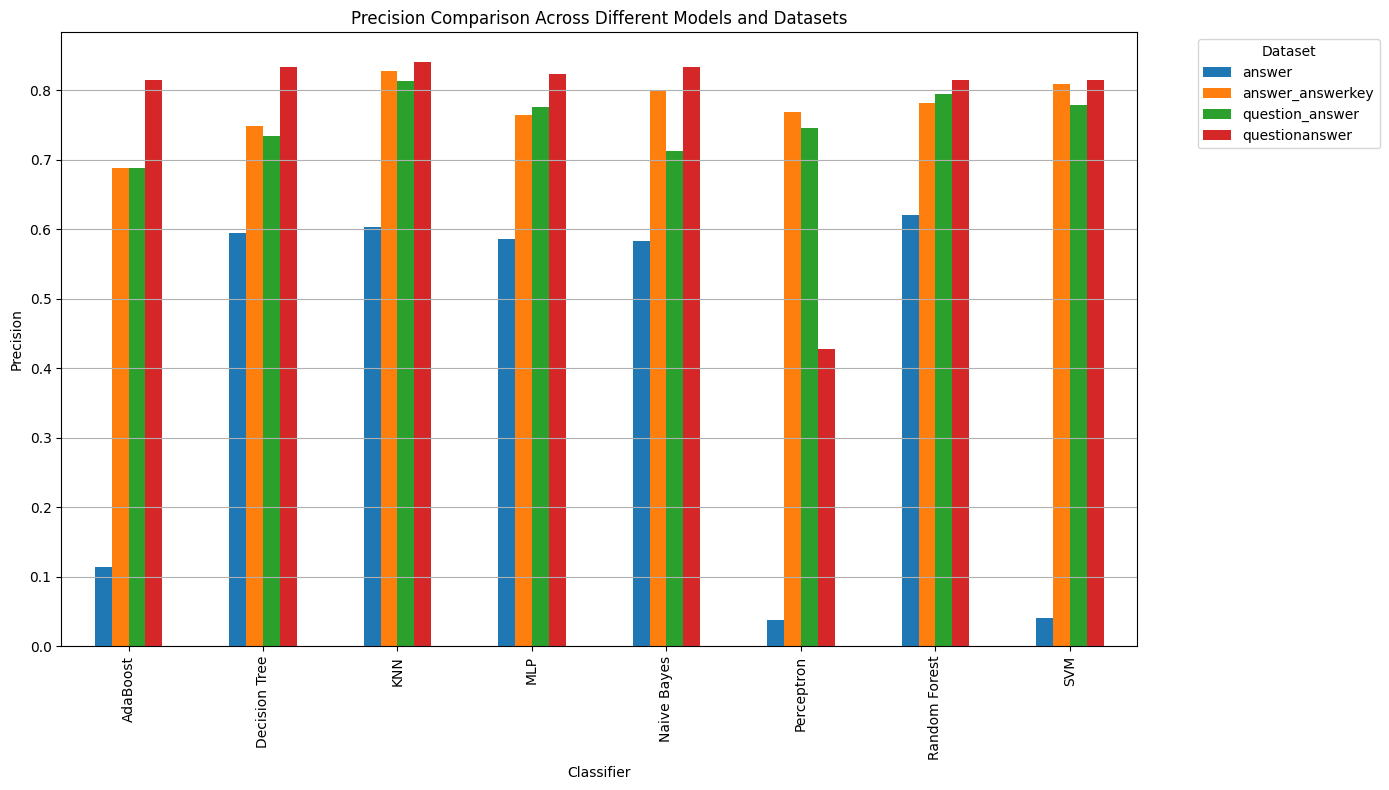

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the final results from the Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\final_results.xlsx"
final_results = pd.read_excel(output_file_path, index_col=[0, 1])

# Reset index to have 'Dataset' and 'Classifier' as columns
final_results = final_results.reset_index().rename(columns={'level_0': 'Dataset', 'level_1': 'Classifier'})

# Filter the results to include only Precision scores
precision_scores = final_results.pivot(index='Classifier', columns='Dataset', values='Precision')

# Plotting the Precision scores
precision_scores.plot(kind='bar', figsize=(14, 8))
plt.title('Precision Comparison Across Different Models and Datasets')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Confusion matrix and model fitting

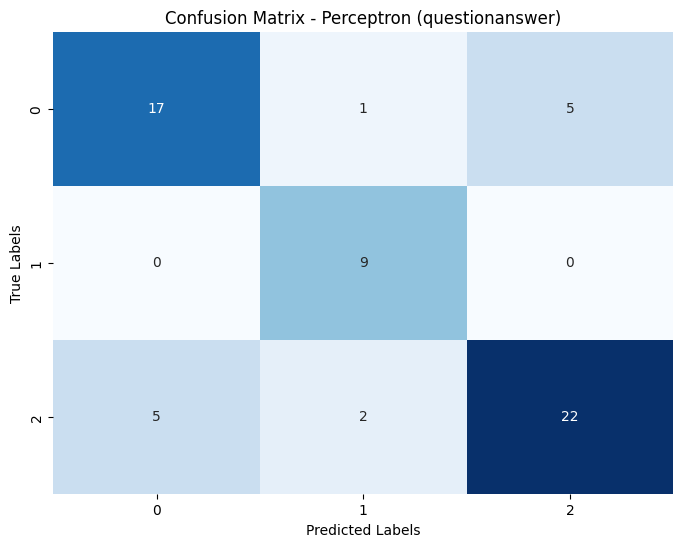

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


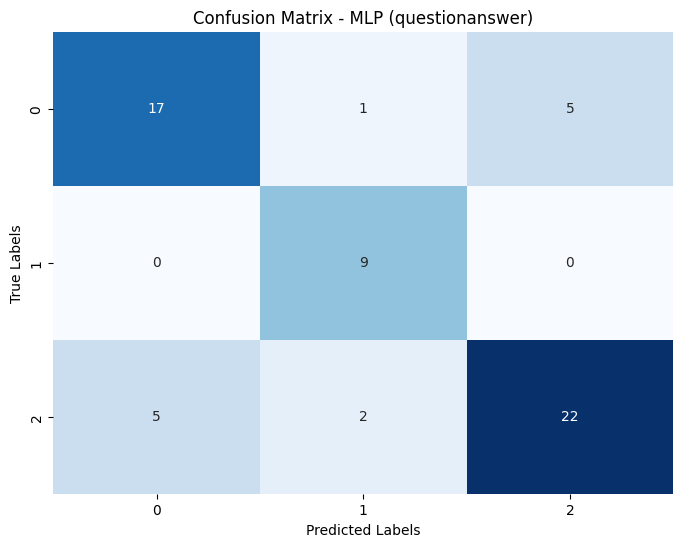

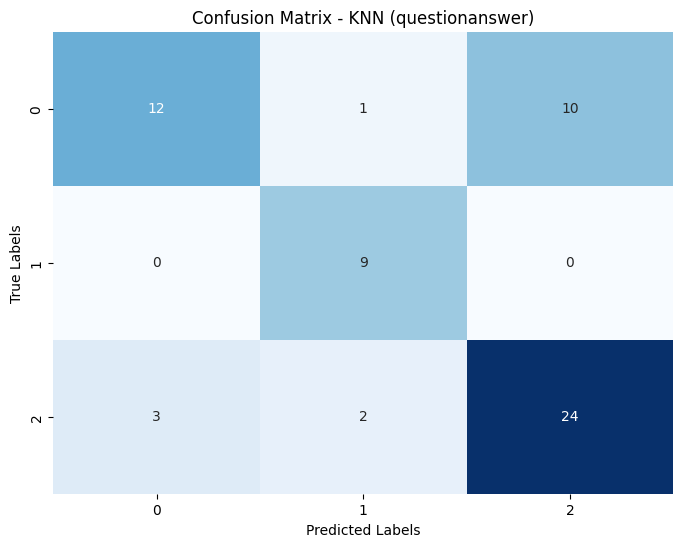

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


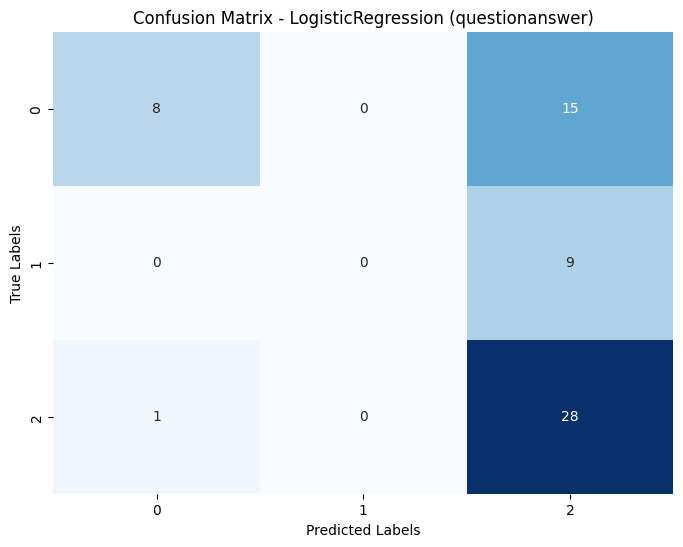

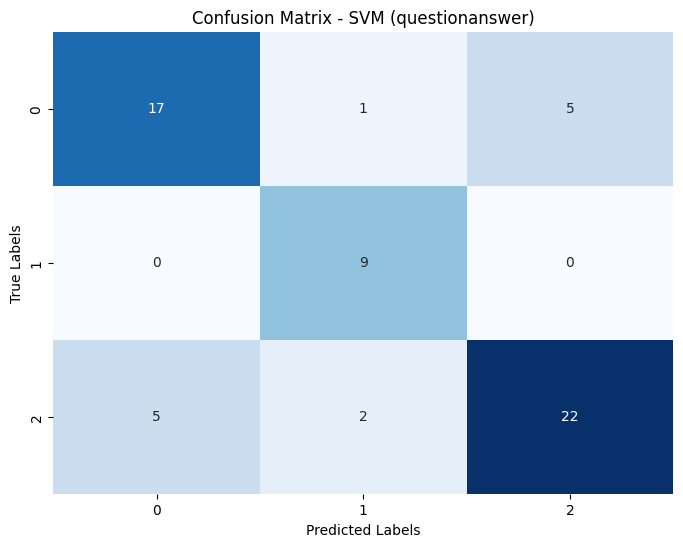

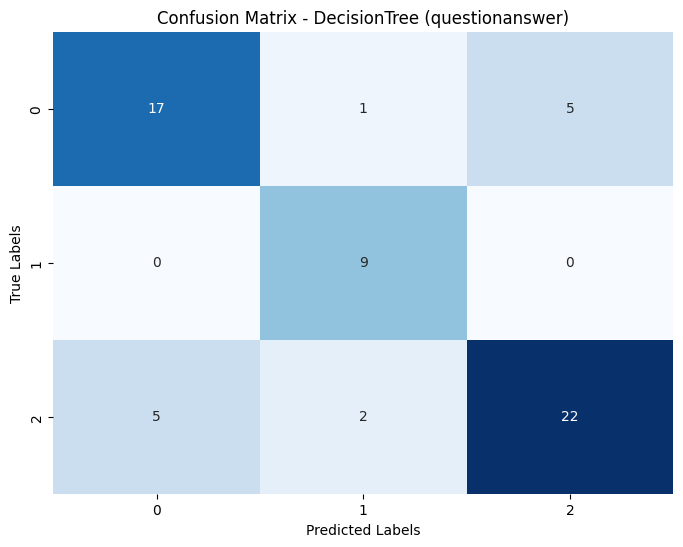

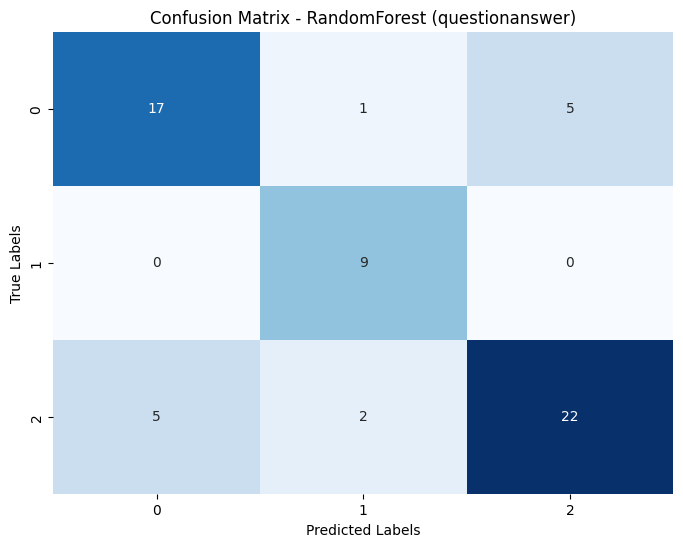

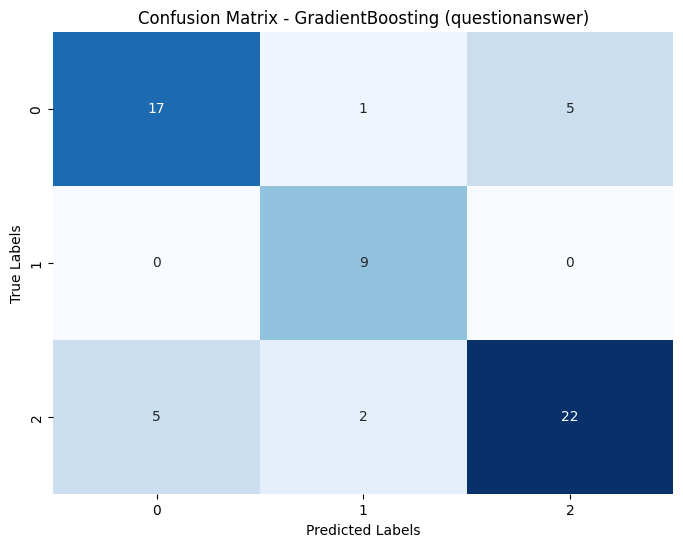

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


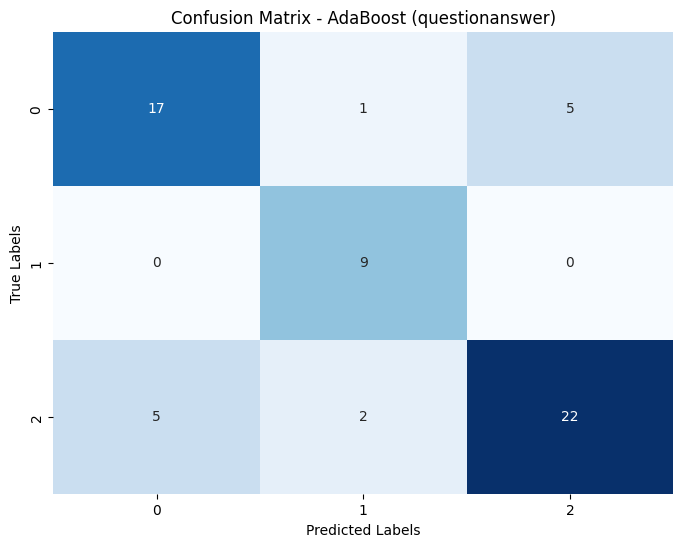

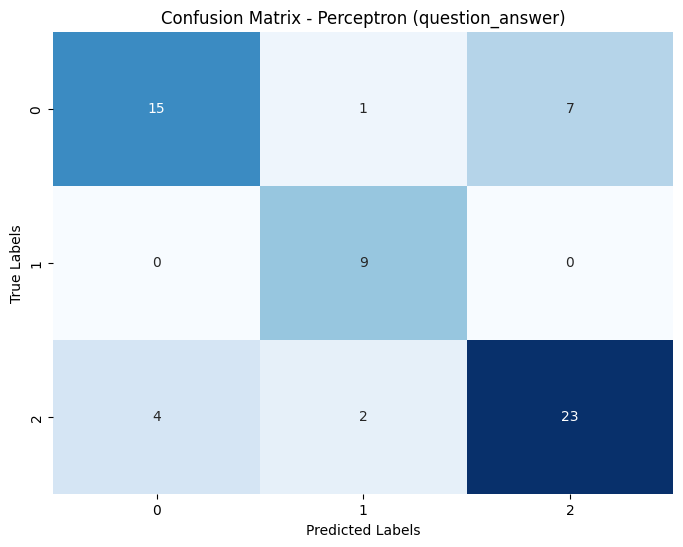

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


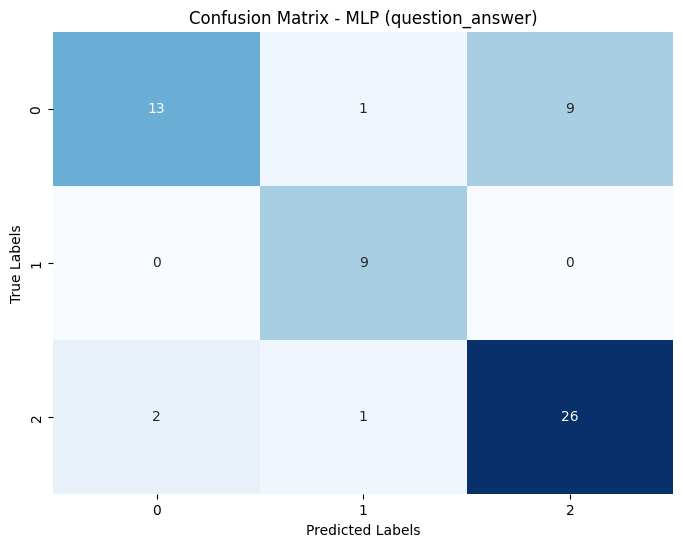

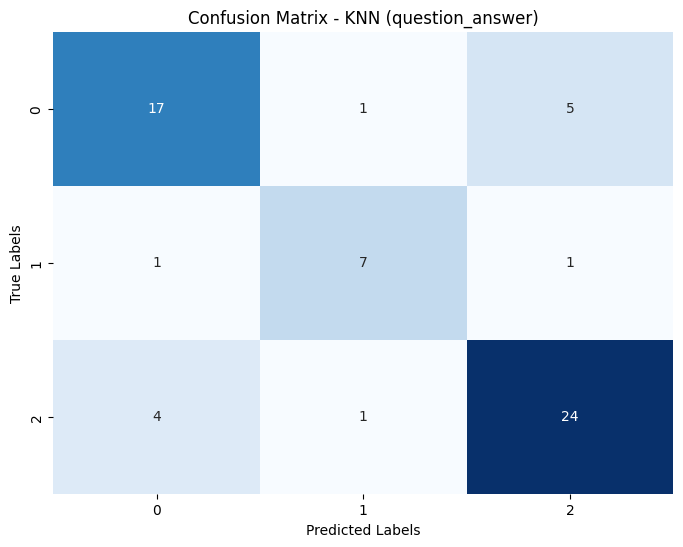

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


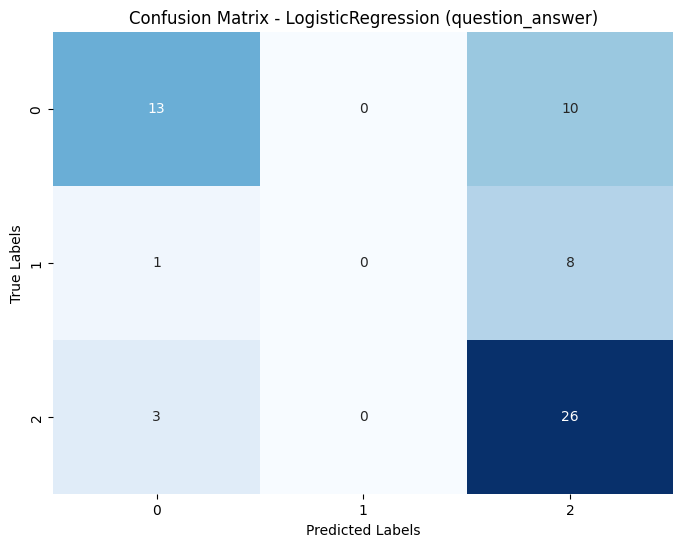

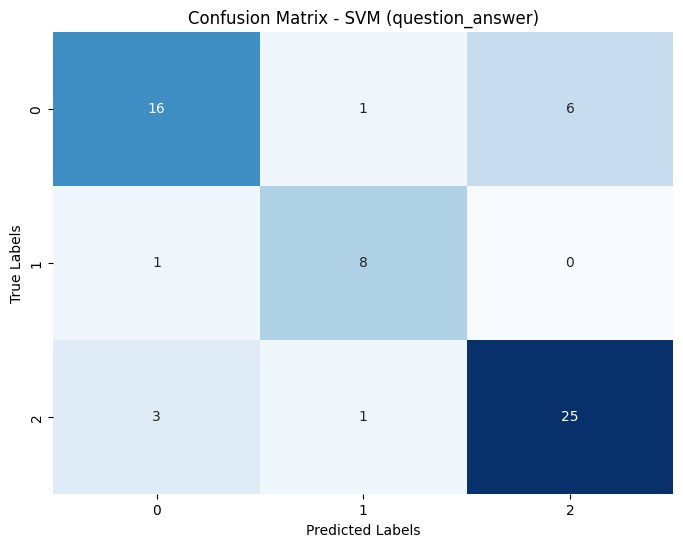

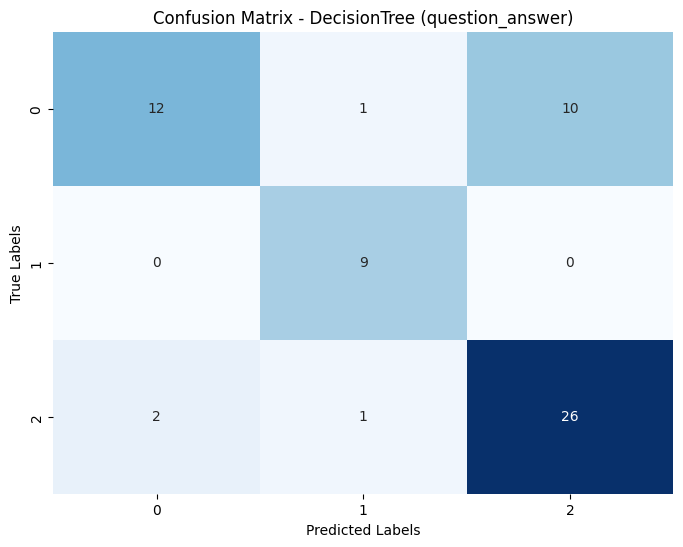

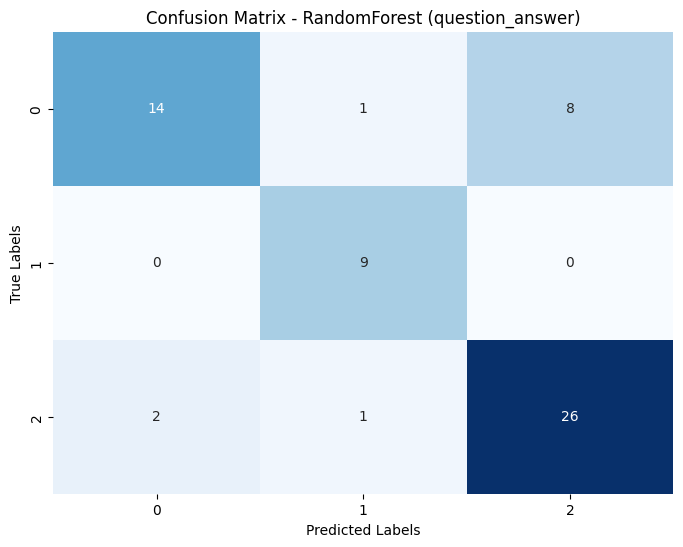

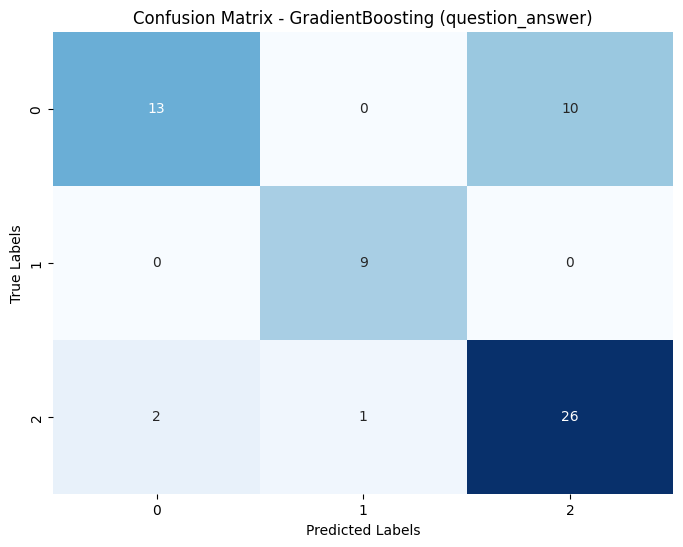

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


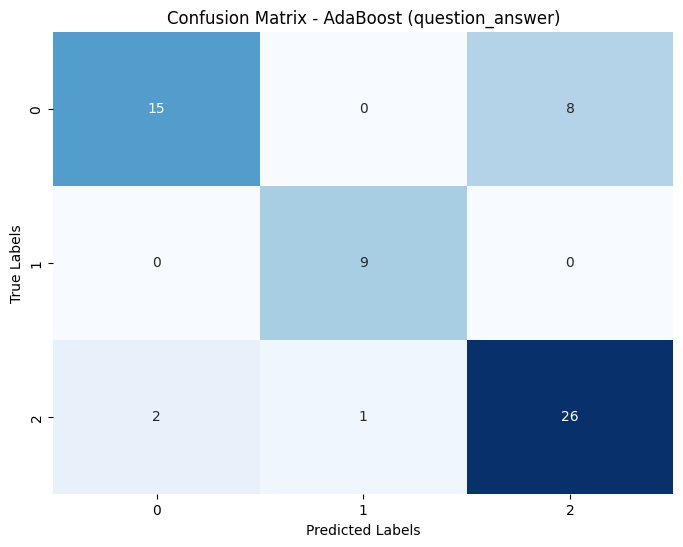

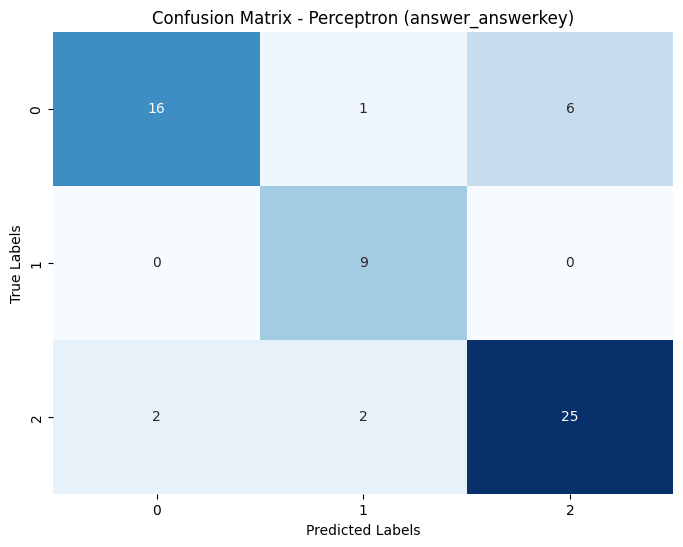

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


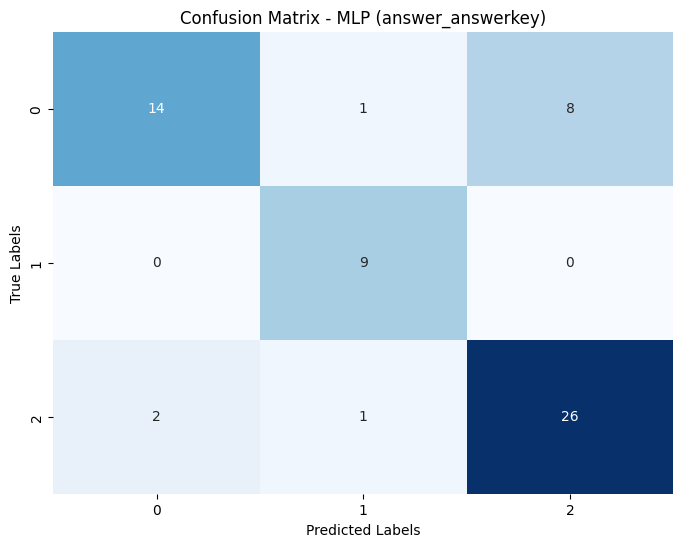

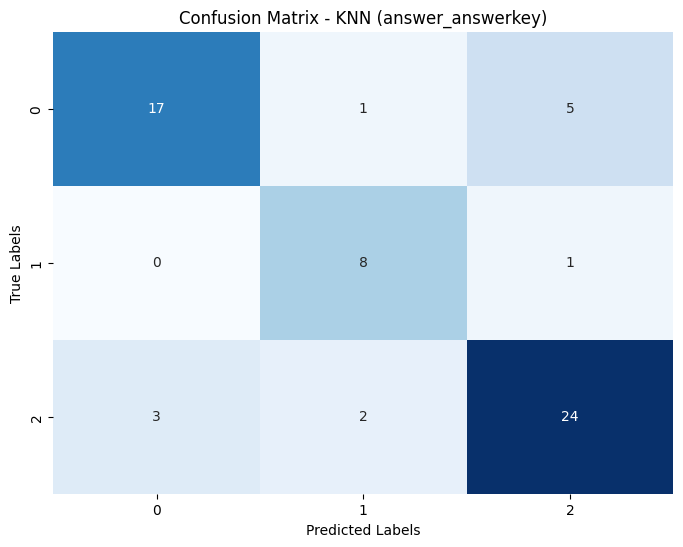

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


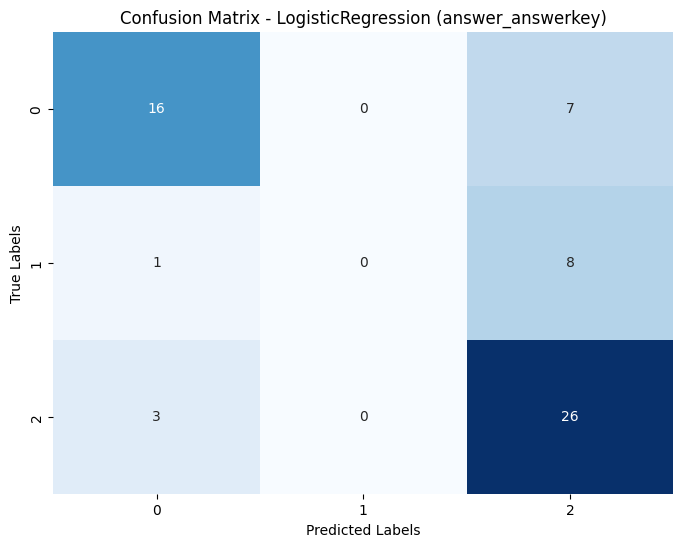

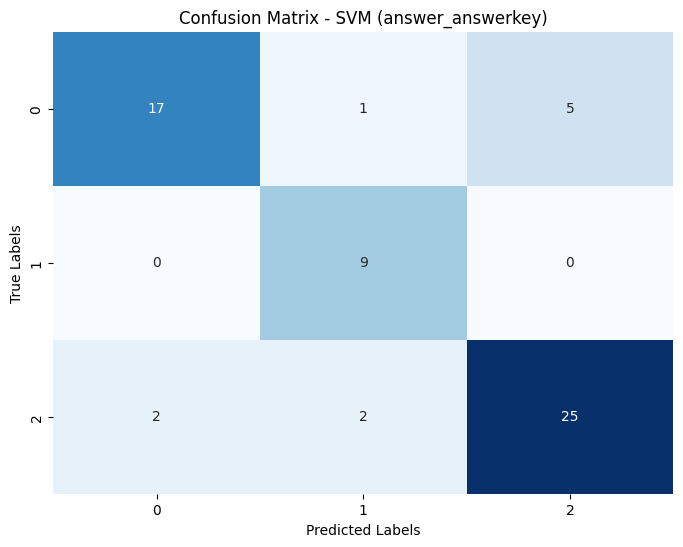

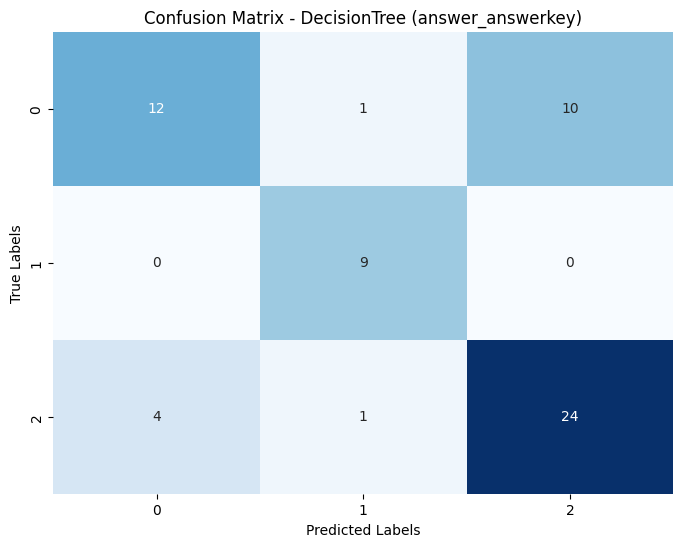

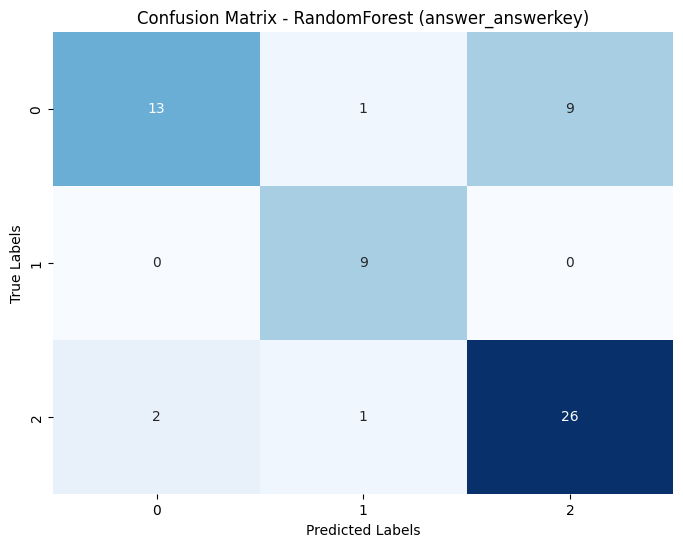

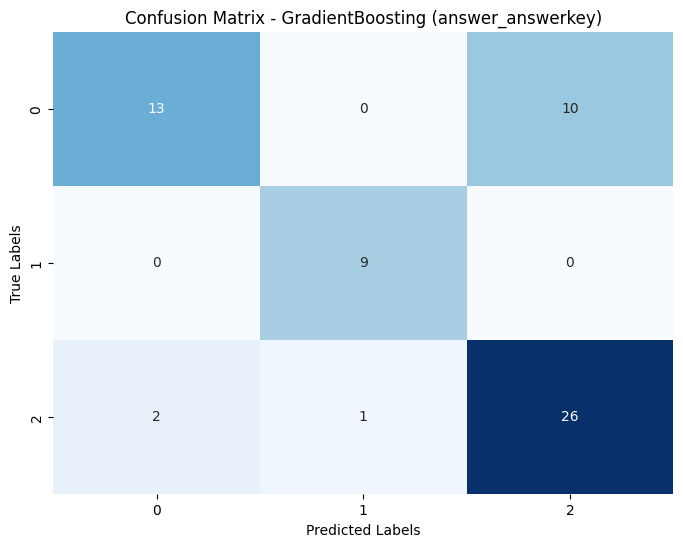

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


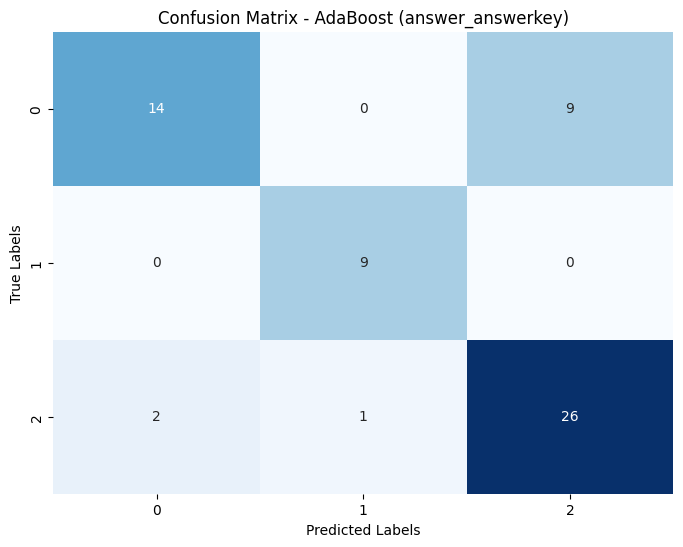

Classification metrics saved to C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\classification_metrics.xlsx


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Define classifiers
classifiers = {
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Define dataset names and paths
dataset_names = ['questionanswer', 'question_answer', 'answer_answerkey']
dataset_paths = [
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\questionanswer.xlsx",
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\question_answer.xlsx",
    r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\answer_answerkey.xlsx"
]

results = {
    'Dataset': [],
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Loop over each dataset and evaluate classifiers
for dataset_name, dataset_path in zip(dataset_names, dataset_paths):
    # Load data from Excel file
    data = pd.read_excel(dataset_path)

    # Convert column names to string
    data.columns = data.columns.astype(str)

    # Encode labels
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])

    # Separate features (X) and target (y)
    X = data.iloc[:, :-1]
    y = data['Label']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Evaluate each classifier
    for clf_name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict labels for the test set
        y_test_pred = clf.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='macro')
        recall = recall_score(y_test, y_test_pred, average='macro')
        f1 = f1_score(y_test, y_test_pred, average='macro')

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)

        # Store results in the dictionary
        results['Dataset'].append(dataset_name)
        results['Classifier'].append(clf_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1 Score'].append(f1)
        results['Confusion Matrix'].append(cm)  # Store confusion matrix

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {clf_name} ({dataset_name})')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Save results to an Excel file
output_file_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\classification_metrics.xlsx"
results_df.to_excel(output_file_path, index=False)
print(f"Classification metrics saved to {output_file_path}")


ROC Curve Plotting

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


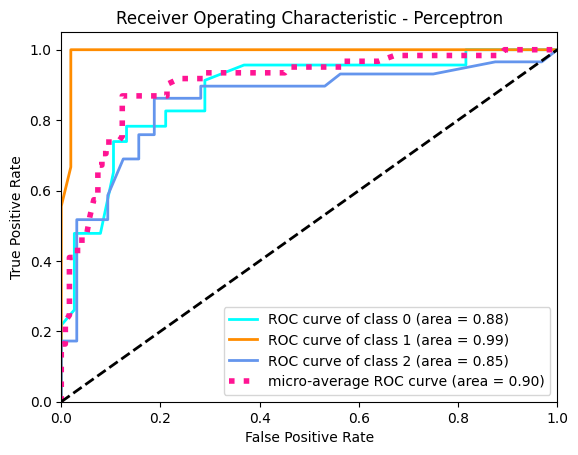

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the

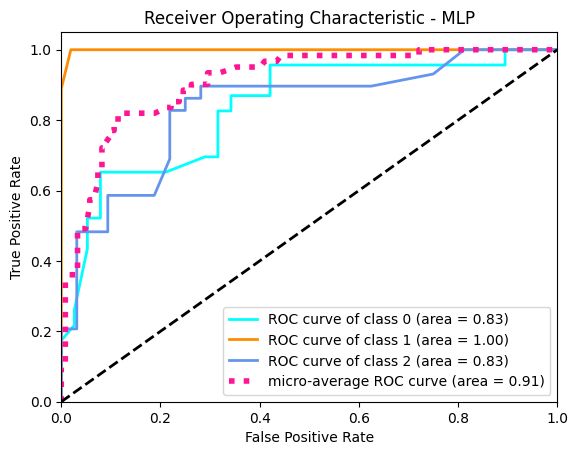

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


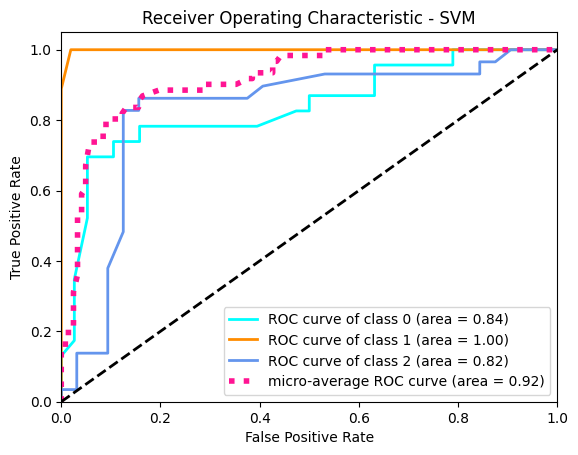

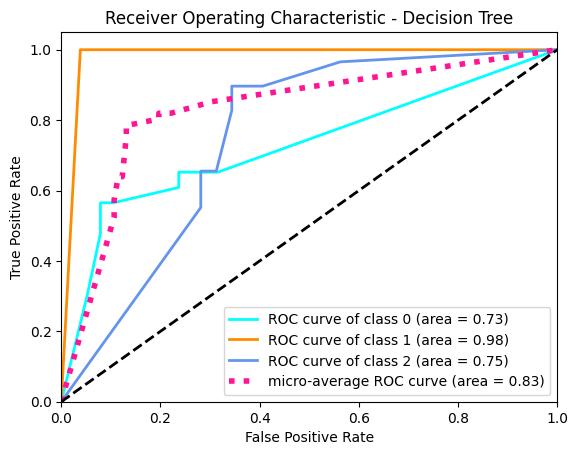

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_trai

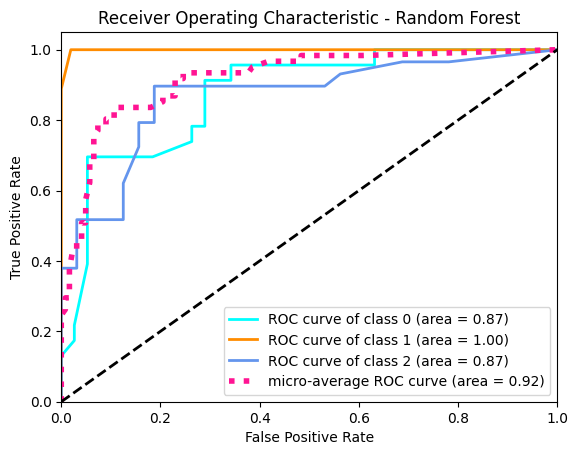

c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\kavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated

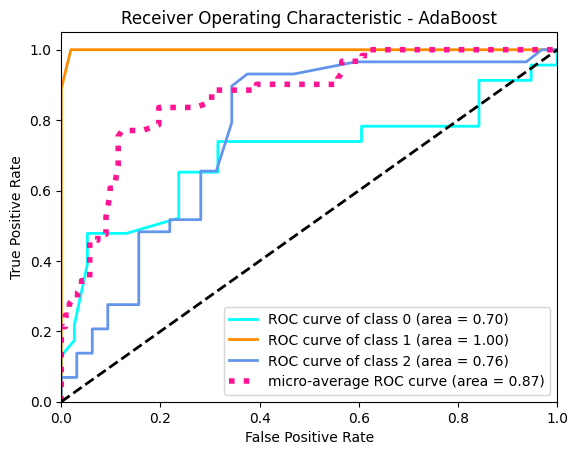

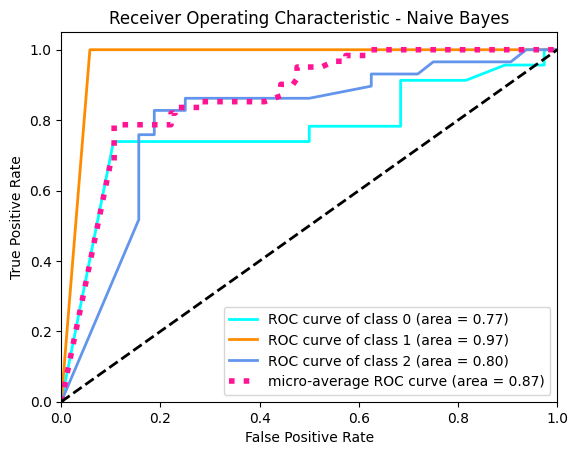

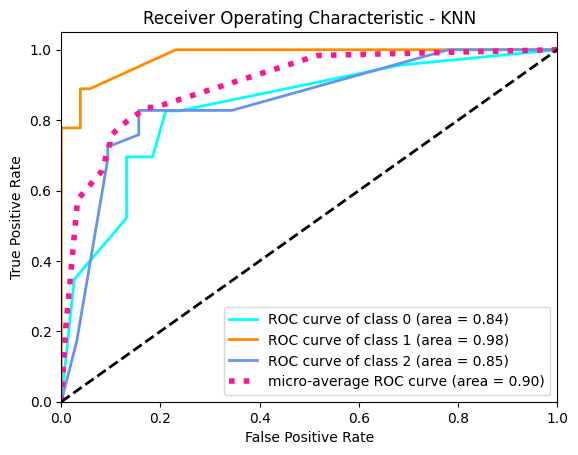

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle

# Define classifiers and parameter grids
classifiers = {
    'Perceptron': Perceptron(),
    'MLP': MLPClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability=True to enable predict_proba
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier()
}

# Define parameter grids for classifiers supporting hyperparameter tuning
perceptron_param_grid = {'max_iter': [1000, 1500, 2000], 'tol': [1e-3, 1e-4, 1e-5]}
mlp_param_grid = {'hidden_layer_sizes': [(50, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam']}
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
random_forest_param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2']}
adaboost_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.5, 1, 1.5]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

param_grids = {
    'Perceptron': perceptron_param_grid,
    'MLP': mlp_param_grid,
    'SVM': svm_param_grid,
    'Random Forest': random_forest_param_grid,
    'AdaBoost': adaboost_param_grid,
    'KNN': knn_param_grid
}

# Define function to plot ROC curves
def plot_roc_curve(classifier_name, y_test, y_score, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.figure()
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

# Load data from a single Excel file (replace 'your_dataset_path.xlsx' with your actual file path)
dataset_path = r"C:\Users\kavin\OneDrive\Documents\Sem 4\ML sem4\project\combined\question_answer.xlsx"
data = pd.read_excel(dataset_path)

# Convert column names to string
data.columns = data.columns.astype(str)

# Assuming 'Label' is the column you want to encode (target variable)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Separate features (X) and target (y)
X = data.iloc[:, :-1]
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Binarize the output
y_train_binarized = label_binarize(y_train, classes=np.arange(len(np.unique(y))))
y_test_binarized = label_binarize(y_test, classes=np.arange(len(np.unique(y))))
n_classes = y_train_binarized.shape[1]

# Tune and evaluate each classifier
for classifier_name, classifier in classifiers.items():
    # Hyperparameter tuning for classifiers supporting it
    if classifier_name in param_grids:
        random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grids[classifier_name], n_iter=10, cv=5, scoring='accuracy', random_state=42)
        random_search.fit(X_train, y_train)
        classifier = random_search.best_estimator_

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(classifier)

    # Check if the classifier has predict_proba or decision_function
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.fit(X_train, y_train_binarized).predict_proba(X_test)
    elif hasattr(classifier, "decision_function"):
        y_score = classifier.fit(X_train, y_train_binarized).decision_function(X_test)
    else:
        print(f"{classifier_name} does not support predict_proba or decision_function.")
        continue

    # Plot ROC curve for classifiers that support it
    plot_roc_curve(classifier_name, y_test_binarized, y_score, n_classes)
